In [1]:
# Test your Gemini API
import google.generativeai as genai

**Register the API Key to invoke the Gemini AI, deleted the output for security**

In [ ]:
# You'll enter your API key when prompted
api_key = input("Enter your Gemini API key: ")
genai.configure(api_key=api_key)

**Load the Gemini LLM model**

*Ask the LLM to generate 5 most important business questions that must be investigated*

In [3]:
model = genai.GenerativeModel('gemini-2.5-pro')
prompt = """
Please refer to my data table schema

field name	mode	type	description
Row ID	NULLABLE	INTEGER
Order ID	NULLABLE	STRING
Order Date	NULLABLE	DATE
Ship Date	NULLABLE	DATE
Ship Mode	NULLABLE	STRING
Customer ID	NULLABLE	STRING
Customer Name	NULLABLE	STRING
Segment	NULLABLE	STRING
Country	NULLABLE	STRING
City	NULLABLE	STRING
State	NULLABLE	STRING
Postal Code	NULLABLE	INTEGER
Region	NULLABLE	STRING
Product ID	NULLABLE	STRING
Category	NULLABLE	STRING
Sub-Category	NULLABLE	STRING
Product Name	NULLABLE	STRING
Sales	NULLABLE	FLOAT
Quantity	NULLABLE	INTEGER
Discount	NULLABLE	FLOAT
Profit	NULLABLE	FLOAT

As a retail analyst, what are the 5 most important business questions
I should investigate with this data? For each question, explain why
it matters and which columns I should analyze.
"""

response = model.generate_content(prompt)
print(response.text)

Of course. As a retail analyst, this is an excellent dataset to work with. The key is to ask questions that directly link operational data to strategic business outcomes like profitability, customer retention, and market growth.

Here are the 5 most important business questions you should investigate with this data, along with why they matter and the columns to use.

---

### 1. Which products and product categories are the biggest drivers of profitability?

*   **The Question:** What are our most and least profitable products and sub-categories? Are there products that sell in high volume but generate low profit, or even losses?
*   **Why it Matters:** This is the most fundamental question for any retail business. Answering it allows you to optimize your product portfolio. You can focus marketing spend on high-profit items, reconsider pricing or sourcing for low-profit items, and potentially discontinue products that are losing money (especially after factoring in discounts). It helps

**Load the Google Big query Library**


In [5]:
pip install google-cloud-bigquery pandas db-dtypes

**Authorize Collab Access**

In [8]:
!gcloud auth application-default login

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=sS6wAIZIvguLSSaW4OzVCiGZfUFMef&prompt=consent&token_usage=remote&access_type=offline&code_challenge=Qyd0ozqCF4RTGIORoEGVrCXJ93O6H9kUcYhDTSIA1P0&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 4/0AVMBsJgHQaSb-a-lQaDYAl7U_Xr0eAVB9RKFgzSjST1vimuMcaGosvhU2b_cmfNvCEtAwA

Credentials saved to file: [/content/.config/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).
Ca

**Query the Data and convert that into a data frame**

In [13]:
from google.cloud import bigquery
import pandas as pd

# Your Google Cloud Project ID
# Replace 'your-gcp-project-id' with your actual project ID.
# Based on your previous context, your project ID is 'mgmt599-senthilm-lab1'
project_id = 'mgmt599-senthilm-lab1'

# The name of your BigQuery dataset and table
# Assuming your table 'nvidia_stocks' is within a dataset, for example, 'your_dataset_name'
# If it's in the default dataset or you're not sure, you might need to adjust this.
# Let's assume the table is in a dataset named 'mydataset' for this example.
# Please adjust 'mydataset' if your table is in a different dataset.
dataset_name = 'mgmt599_senthilm_lab1_eda' # <-- **IMPORTANT: Replace 'mydataset' with your actual BigQuery dataset name**
table_name = 'superstore_sales'

# Construct a BigQuery client object.
client = bigquery.Client(project=project_id)

# Define the SQL query to select all data from your table
# Ensure the full table path is correct: `project_id.dataset_name.table_name`
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

print(f"Executing BigQuery query to pull data from: {project_id}.{dataset_name}.{table_name}")

try:
    # Run the query and load results into a Pandas DataFrame
    df = client.query(query).to_dataframe()

    print("Data successfully loaded into Pandas DataFrame!")
    print(f"DataFrame shape: {df.shape}")
    print("\nFirst 5 rows of the DataFrame:\n", df.head())
    print("\nDataFrame info:\n")
    df.info()

except Exception as e:
    print(f"An error occurred while pulling data from BigQuery: {e}")
    print("Please ensure:")
    print("1. Your `project_id` and `dataset_name` are correct.")
    print("2. You have the `google-cloud-bigquery` library installed (`pip install google-cloud-bigquery pandas db-dtypes`).")
    print("3. Your environment is authenticated to Google Cloud (e.g., `gcloud auth application-default login`).")
    print("4. The service account or user account running this code has BigQuery Data Viewer permissions for the table.")

/usr/local/lib/python3.11/dist-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


Executing BigQuery query to pull data from: mgmt599-senthilm-lab1.mgmt599_senthilm_lab1_eda.superstore_sales
Data successfully loaded into Pandas DataFrame!
DataFrame shape: (9994, 21)

First 5 rows of the DataFrame:
    Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0    5769  CA-2015-154900  2015-02-25  2015-03-01  Standard Class    SS-20875   
1    5770  CA-2015-154900  2015-02-25  2015-03-01  Standard Class    SS-20875   
2    9028  US-2016-152415  2016-09-17  2016-09-22  Standard Class    PO-18865   
3    9029  US-2016-152415  2016-09-17  2016-09-22  Standard Class    PO-18865   
4    8332  CA-2016-153269  2016-03-09  2016-03-12     First Class    PS-18760   

       Customer Name   Segment        Country         City  ... Postal Code  \
0      Sung Shariari  Consumer  United States   Leominster  ...        1453   
1      Sung Shariari  Consumer  United States   Leominster  ...        1453   
2  Patrick O'Donnell  Consumer  United States  Marlborough

**Data Handling using the Gemini AI generated code**

1.   Handling Missing Values
2.   Handling Duplicates
3.   Handling Categorical Values
4.   Handling Data Consistency


In [30]:
import pandas as pd
import numpy as np # For NaN values

# 1. Load the data from GCS (conceptual, replace with your actual GCS loading code)
# You'd use google-cloud-storage to download the file, then pandas.read_csv
# For demonstration, assuming you have the CSV file locally or in a accessible path:
# from google.cloud import storage
# client = storage.Client(project='mgmt599-senthilm-lab1')
# bucket = client.get_bucket('mgmt599-senthilm-data-lake')
# blob = bucket.blob('Sample - Superstore.csv')
# blob.download_to_filename('Sample - Superstore.csv') # Downloads to local file
# df = pd.read_csv('Sample - Superstore.csv', encoding='latin1') # Often latin1 for this dataset


dfSuperStore = pd.DataFrame(df)

print("Original DataFrame:\n", dfSuperStore)
print("\nOriginal DataFrame Info:\n")
dfSuperStore.info()

# --- Cleaning Steps ---

# 2. Data Type Conversion
print("\n--- Converting Data Types ---")
dfSuperStore['Order Date'] = pd.to_datetime(dfSuperStore['Order Date'], errors='coerce')
dfSuperStore['Ship Date'] = pd.to_datetime(dfSuperStore['Ship Date'], errors='coerce')

# Add a check for NaT values after date conversion
print("\nChecking for NaT values in 'Order Date' after conversion:")
print(dfSuperStore['Order Date'].isnull().sum())
print("\nChecking for NaT values in 'Ship Date' after conversion:")
print(dfSuperStore['Ship Date'].isnull().sum())


numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
for col in numerical_cols:
    # Safely convert, handling potential non-numeric characters like '$' or ','
    # Ensure column is string type before replace
    dfSuperStore[col] = pd.to_numeric(dfSuperStore[col].astype(str).str.replace(r'[$,]', '', regex=True), errors='coerce')


print("\nDataFrame after initial type conversion:\n")
dfSuperStore.info()

# 3. Handling Duplicates
print("\n--- Handling Duplicates ---")
initial_rows = len(dfSuperStore)
# For Superstore, a combination of Order ID and Product ID usually identifies a unique line item
dfSuperStore.drop_duplicates(subset=['Order ID', 'Product ID'], keep='first', inplace=True)
print(f"Removed {initial_rows - len(dfSuperStore)} duplicate rows based on 'Order ID' and 'Product ID'.")

# 4. Handling Missing Values
print("\n--- Handling Missing Values ---")
print("Missing values before imputation/dropping:\n", dfSuperStore.isnull().sum())

# Drop rows where critical dates are missing (e.g., due to 'coerce' from invalid date strings)
dfSuperStore.dropna(subset=['Order Date', 'Ship Date'], inplace=True)

# Handle Postal Code: Convert to string before checking and handling NaNs
dfSuperStore['Postal Code'] = dfSuperStore['Postal Code'].astype(str).apply(lambda x: x if x.isdigit() and len(x) == 5 else np.nan)
# For demonstration, filling Postal Code with a placeholder 'UNKNOWN'
dfSuperStore['Postal Code'].fillna('UNKNOWN', inplace=True)

# For numeric columns (Sales, Quantity, Discount, Profit) if NaNs resulted from 'coerce'
# For transactional data, dropping is often preferred if meaning of missing is unknown.
# Alternatively, fill with 0 if that's the logical meaning (e.g., 0 discount).
for col in numerical_cols:
    dfSuperStore[col].fillna(0, inplace=True) # Example: fill numerical NaNs with 0

print("\nMissing values after handling:\n", dfSuperStore.isnull().sum())

# 5. Data Consistency and Standardization
print("\n--- Data Consistency and Standardization ---")

# Standardize categorical columns
categorical_cols = ['Ship Mode', 'Category', 'Sub-Category', 'Customer ID', 'Segment', 'Product ID'] # Add more as needed
for col in categorical_cols:
    if col in dfSuperStore.columns:
        dfSuperStore[col] = dfSuperStore[col].astype(str).str.strip().str.title()

# Check for Ship Date < Order Date
inconsistent_ship_dates = dfSuperStore[dfSuperStore['Ship Date'] < dfSuperStore['Order Date']]
if not inconsistent_ship_dates.empty:
    print(f"Found {len(inconsistent_ship_dates)} rows where Ship Date < Order Date. These rows will be dropped.")
    dfSuperStore.drop(inconsistent_ship_dates.index, inplace=True)
else:
    print("No rows found where Ship Date < Order Date.")

# Check for illogical quantities (e.g., negative) - already handled by filling with 0 above if quantity was invalid
# if 'Quantity' in df.columns:
#     invalid_quantity = df[df['Quantity'] < 0]
#     if not invalid_quantity.empty:
#         print(f"Found {len(invalid_quantity)} rows with negative Quantity. Setting to 0.")
#         df.loc[invalid_quantity.index, 'Quantity'] = 0

print("\nCleaned DataFrame (sample):\n", dfSuperStore.head())
print("\nCleaned DataFrame Info:\n")
dfSuperStore.info()

Original DataFrame:
       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0       5769  CA-2015-154900  2015-02-25  2015-03-01  Standard Class   
1       5770  CA-2015-154900  2015-02-25  2015-03-01  Standard Class   
2       9028  US-2016-152415  2016-09-17  2016-09-22  Standard Class   
3       9029  US-2016-152415  2016-09-17  2016-09-22  Standard Class   
4       8332  CA-2016-153269  2016-03-09  2016-03-12     First Class   
...      ...             ...         ...         ...             ...   
9989    9753  US-2016-158680  2016-07-01  2016-07-02     First Class   
9990    5051  CA-2015-150511  2015-09-18  2015-09-24  Standard Class   
9991    5254  US-2014-131982  2014-03-07  2014-03-11    Second Class   
9992    1001  CA-2016-155488  2016-11-13  2016-11-17  Standard Class   
9993    9451  CA-2017-145506  2017-06-03  2017-06-07  Standard Class   

     Customer ID      Customer Name      Segment        Country         City  \
0       SS-20875      Sung Shariar

/tmp/ipython-input-30-1386608568.py:62: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfSuperStore['Postal Code'].fillna('UNKNOWN', inplace=True)
/tmp/ipython-input-30-1386608568.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

**Gemini AI generated Data Statistics**

In [16]:
import pandas as pd
import numpy as np # For potential NaN handling if needed


# Ensure correct data types (after initial loading/cleaning)
dfSuperStore['Order Date'] = pd.to_datetime(dfSuperStore['Order Date'])
dfSuperStore['Ship Date'] = pd.to_datetime(dfSuperStore['Ship Date'])
dfSuperStore['Postal Code'] = dfSuperStore['Postal Code'].astype(str) # Should be string if not doing calculations

print("--- Overall Data Overview ---")
print(f"DataFrame Shape: {dfSuperStore.shape}")
print("\nDataFrame Info:")
dfSuperStore.info()
print("\nMissing Values Count:")
print(dfSuperStore.isnull().sum())
print("\nUnique Values per Column:")
print(dfSuperStore.nunique())

print("\n--- Descriptive Statistics for Numerical Columns ---")
print("\nSummary Statistics for Sales, Quantity, Discount, Profit:")
print(dfSuperStore[['Sales', 'Quantity', 'Discount', 'Profit']].describe())

print("\nCorrelation Matrix (Numerical Columns):")
print(dfSuperStore[['Sales', 'Quantity', 'Discount', 'Profit']].corr()) # Using only relevant numerical columns

print("\n--- Statistics for Categorical Columns ---")
print("\nValue Counts for 'Category':")
print(dfSuperStore['Category'].value_counts())
print("\nValue Counts (Percentages) for 'Ship Mode':")
print(dfSuperStore['Ship Mode'].value_counts(normalize=True))

print("\nCross-tabulation of 'Region' and 'Category':")
print(pd.crosstab(dfSuperStore['Ship Mode'], df['Category']))

print("\n--- Time-Series Specific Statistics ---")
print(f"\nOrder Date Range: {dfSuperStore['Order Date'].min()} to {dfSuperStore['Order Date'].max()}")
print(f"Ship Date Range: {dfSuperStore['Ship Date'].min()} to {dfSuperStore['Ship Date'].max()}")
print(f"Average Order-to-Ship Duration: {(dfSuperStore['Ship Date'] - dfSuperStore['Order Date']).mean()}")

print("\n--- Business-Specific Aggregations ---")
print("\nTotal Sales by Category:")
print(dfSuperStore.groupby('Category')['Sales'].sum().sort_values(ascending=False))

print("\nAverage Profit by Ship Mode:")
print(dfSuperStore.groupby('Ship Mode')['Profit'].mean())

print("\nTop 3 Customers by Total Sales:")
print(dfSuperStore.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False).head(3))

print("\nSales Trends by Year:")
print(dfSuperStore.set_index('Order Date').resample('Y')['Sales'].sum())


--- Overall Data Overview ---
DataFrame Shape: (9986, 21)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9986 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9986 non-null   Int64         
 1   Order ID       9986 non-null   object        
 2   Order Date     9986 non-null   datetime64[ns]
 3   Ship Date      9986 non-null   datetime64[ns]
 4   Ship Mode      9986 non-null   object        
 5   Customer ID    9986 non-null   object        
 6   Customer Name  9986 non-null   object        
 7   Segment        9986 non-null   object        
 8   Country        9986 non-null   object        
 9   City           9986 non-null   object        
 10  State          9986 non-null   object        
 11  Postal Code    9986 non-null   object        
 12  Region         9986 non-null   object        
 13  Product ID     9986 non-null   object        
 14  Ca

/tmp/ipython-input-16-2243202794.py:51: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  print(dfSuperStore.set_index('Order Date').resample('Y')['Sales'].sum())


**Requesting Gemini AI to generate a summary based on Data Statistics**

In [17]:
prompt = """
Please refer to my data table statistics

fData columns (total 21 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Row ID         9986 non-null   Int64
 1   Order ID       9986 non-null   object
 2   Order Date     9986 non-null   datetime64[ns]
 3   Ship Date      9986 non-null   datetime64[ns]
 4   Ship Mode      9986 non-null   object
 5   Customer ID    9986 non-null   object
 6   Customer Name  9986 non-null   object
 7   Segment        9986 non-null   object
 8   Country        9986 non-null   object
 9   City           9986 non-null   object
 10  State          9986 non-null   object
 11  Postal Code    9986 non-null   object
 12  Region         9986 non-null   object
 13  Product ID     9986 non-null   object
 14  Category       9986 non-null   object
 15  Sub-Category   9986 non-null   object
 16  Product Name   9986 non-null   object
 17  Sales          9986 non-null   float64
 18  Quantity       9986 non-null   int64
 19  Discount       9986 non-null   float64
 20  Profit         9986 non-null   float64
dtypes: Int64(1), datetime64[ns](2), float64(3), int64(1), object(14)
memory usage: 1.7+ MB

Missing Values Count:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Unique Values per Column:
Row ID           9986
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       580
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5823
Quantity           14
Discount           12
Profit           7283
dtype: int64

--- Descriptive Statistics for Numerical Columns ---

Summary Statistics for Sales, Quantity, Discount, Profit:
              Sales     Quantity     Discount       Profit
count   9986.000000  9986.000000  9986.000000  9986.000000
mean     229.872779     3.789305     0.156258    28.641480
std      623.477775     2.225286     0.206499   234.349134
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.248000     2.000000     0.000000     1.728000
50%       54.384000     3.000000     0.200000     8.641350
75%      209.917500     5.000000     0.200000    29.353800
max    22638.480000    14.000000     0.800000  8399.976000

Correlation Matrix (Numerical Columns):
             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200927 -0.028216  0.479056
Quantity  0.200927  1.000000  0.008599  0.066288
Discount -0.028216  0.008599  1.000000 -0.219459
Profit    0.479056  0.066288 -0.219459  1.000000

--- Statistics for Categorical Columns ---

Value Counts for 'Category':
Category
Office Supplies    6022
Furniture          2119
Technology         1845
Name: count, dtype: int64

Value Counts (Percentages) for 'Ship Mode':
Ship Mode
Standard Class    0.597236
Second Class      0.194472
First Class       0.153915
Same Day          0.054376
Name: proportion, dtype: float64

Cross-tabulation of 'Region' and 'Category':
Category        Furniture  Office Supplies  Technology
Ship Mode
First Class           327              909         301
Same Day              119              326          98
Second Class          426             1151         365
Standard Class       1247             3636        1081

--- Time-Series Specific Statistics ---

Order Date Range: 2014-01-03 00:00:00 to 2017-12-30 00:00:00
Ship Date Range: 2014-01-07 00:00:00 to 2018-01-05 00:00:00
Average Order-to-Ship Duration: 3 days 23:00:18.025235329

--- Business-Specific Aggregations ---

Total Sales by Category:
Category
Technology         835759.7370
Furniture          741432.0433
Office Supplies    718317.7920
Name: Sales, dtype: float64

Average Profit by Ship Mode:
Ship Mode
First Class       31.845643
Same Day          29.266591
Second Class      29.449868
Standard Class    27.495584
Name: Profit, dtype: float64

Top 3 Customers by Total Sales:
Customer ID
Sm-20320    25043.050
Tc-20980    19052.218
Rb-19360    15117.339
Name: Sales, dtype: float64

Sales Trends by Year:
Order Date
2014-12-31    483966.1261
2015-12-31    470442.4490
2016-12-31    608532.4580
2017-12-31    732568.5392

What data quality issues should I check for?
What patterns in these statistics might indicate problems?
Suggest specific validation queries I should run.
"""

response = model.generate_content(prompt)
print(response.text)

Excellent! This is a very comprehensive statistical summary. Based on the data you've provided, here is an analysis of potential data quality issues, patterns that indicate problems, and specific validation queries you should run.

### Summary of Findings

Overall, your data appears to be in good shape: it's fully populated (no nulls), has correct data types, and many logical relationships seem sound. However, the statistics have flagged a few **critical inconsistencies and potential issues** that you must investigate before proceeding with any analysis. The most significant red flag is the mismatch between unique Product IDs and Product Names.

---

### 1. What Data Quality Issues Should I Check For?

Here are the general categories of data quality issues you should be looking for, based on your statistics:

*   **Validity & Integrity:** Are the values within a column plausible? (e.g., `Ship Date` must be after `Order Date`; `Discount` should be between 0 and 1).
*   **Consistency & U

**Summary generated by Gemini AI, based on Total Sales, Profit Margin and Top Category**

In [18]:
prompt = """
Initial findings from Superstore data:
- Total sales: $2297200.86
- Profit margin: 12.47%
- Top category: Technology

What do these numbers tell us about the business health?
What additional metrics would provide more context?
What might be concerning about these figures?
"""

response = model.generate_content(prompt)
print(response.text)

Excellent questions. These three initial metrics provide a classic "tip of the iceberg" scenario. Here’s a breakdown of what they tell us, what they hide, and what to ask next.

### 1. What These Numbers Tell Us About Business Health

Based *only* on these figures, the business appears to be **moderately healthy but with potential risks.**

*   **Total Sales ($2.3M):** This figure indicates that the business has achieved a significant scale. It's not a small-time operation; it has a substantial customer base and/or is selling high-value items. On its own, this number represents the company's **market presence**.
*   **Profit Margin (12.47%):** This is the most direct indicator of health. It shows the business is **profitable**. For every dollar of sales, it keeps ~12.5 cents as profit after accounting for costs. In many retail sectors, this would be considered a decent, if not stellar, margin. It suggests the company has some control over its pricing and costs.
*   **Top Category (Tech

**Vusalizations Generated by Gemini AI**

/tmp/ipython-input-19-2474774517.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette='viridis')


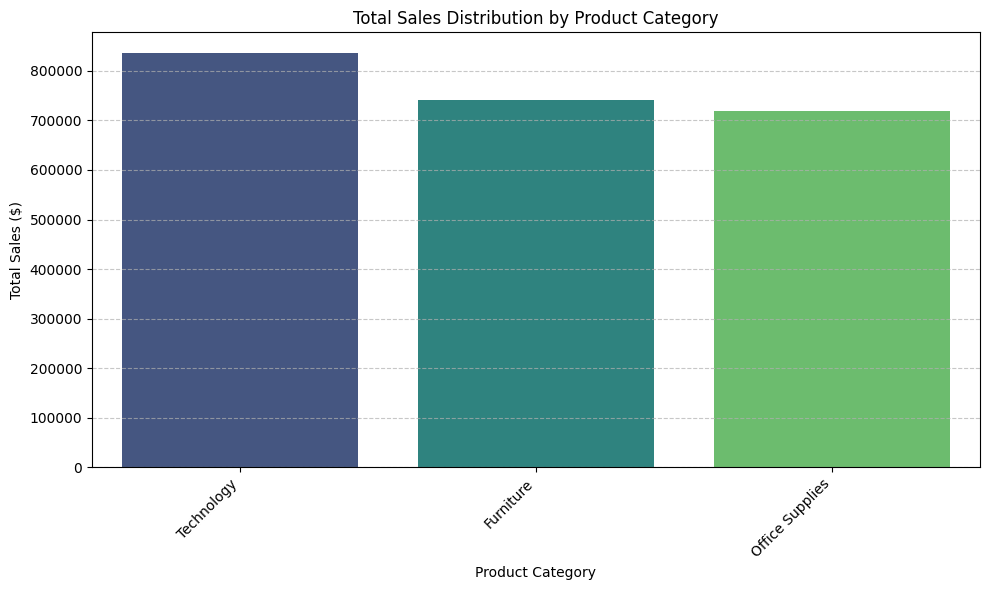

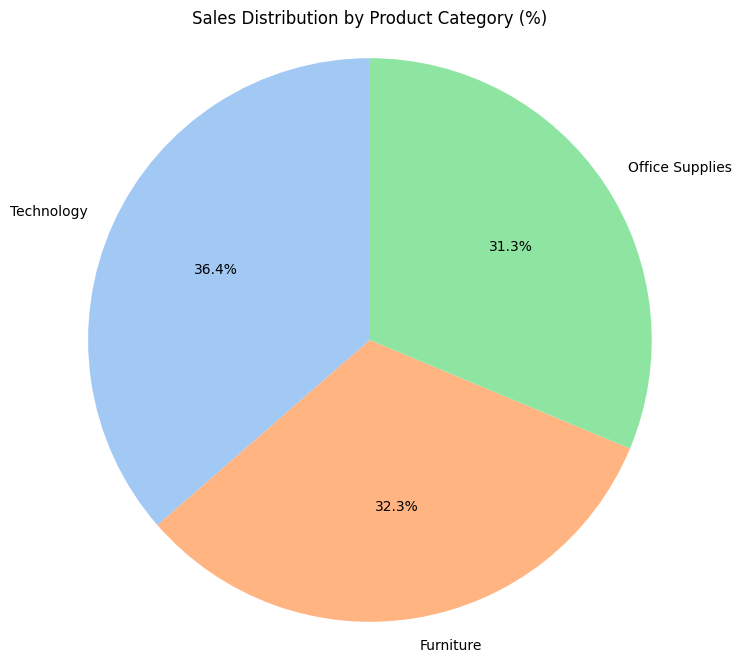

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Aggregate Sales by Category
sales_by_category = dfSuperStore.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# 2. Create the Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette='viridis')

plt.title('Total Sales Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# Alternative: Pie Chart (if categories are few, e.g., 3-5)
if len(sales_by_category) <= 5: # Only if few categories
    plt.figure(figsize=(8, 8))
    plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title('Sales Distribution by Product Category (%)')
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


**Vusalizations Generated by Gemini AI - Profit Trend**

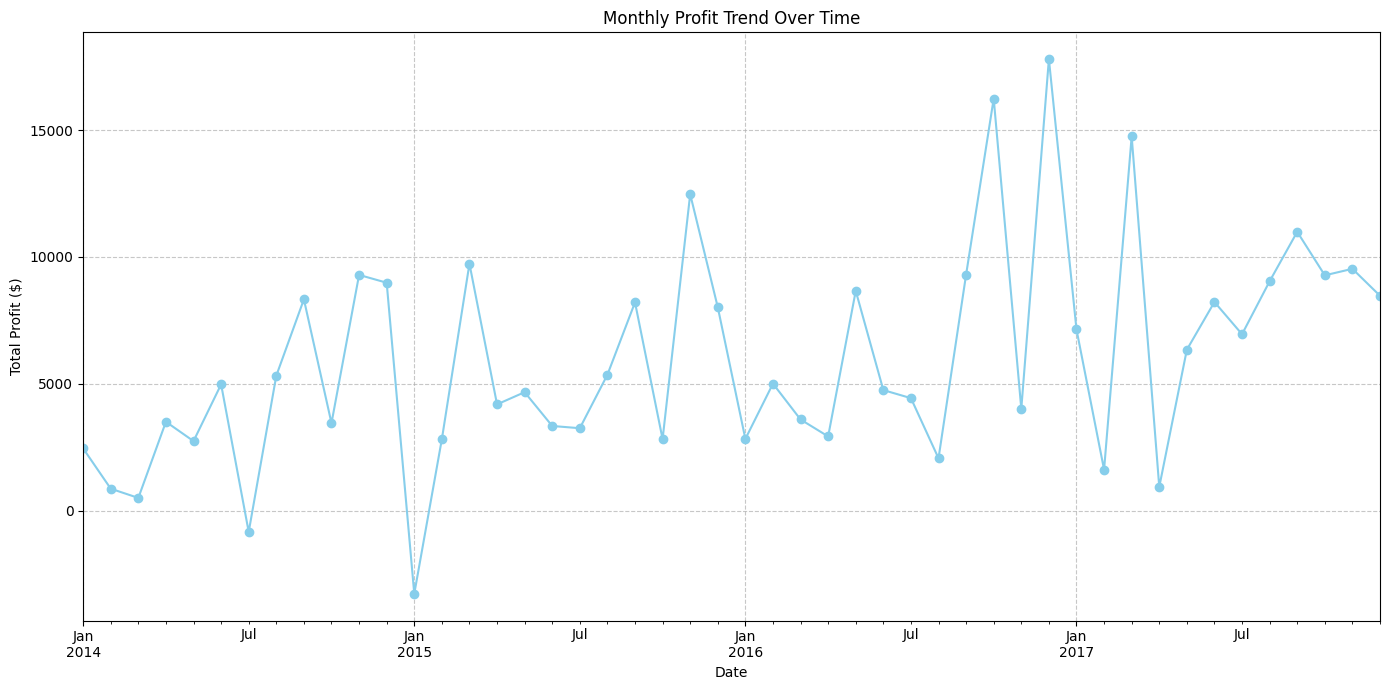

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'Order Date' is datetime and set as index
dfSuperStore['Order Date'] = pd.to_datetime(dfSuperStore['Order Date'])
dfSuperStore.set_index('Order Date', inplace=True)

# Resample to monthly profit and sum
monthly_profit = dfSuperStore['Profit'].resample('M').sum()

# Create the Line Chart
plt.figure(figsize=(14, 7))
monthly_profit.plot(kind='line', marker='o', linestyle='-', color='skyblue')

plt.title('Monthly Profit Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Profit ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# You can also explore yearly or quarterly trends by changing 'M' to 'Y' or 'Q'
# yearly_profit = df['Profit'].resample('Y').sum()
# quarterly_profit = df['Profit'].resample('Q').sum()


**Vusalizations Generated by Gemini AI - Sales and Profit Performance**

<Figure size 1200x700 with 0 Axes>

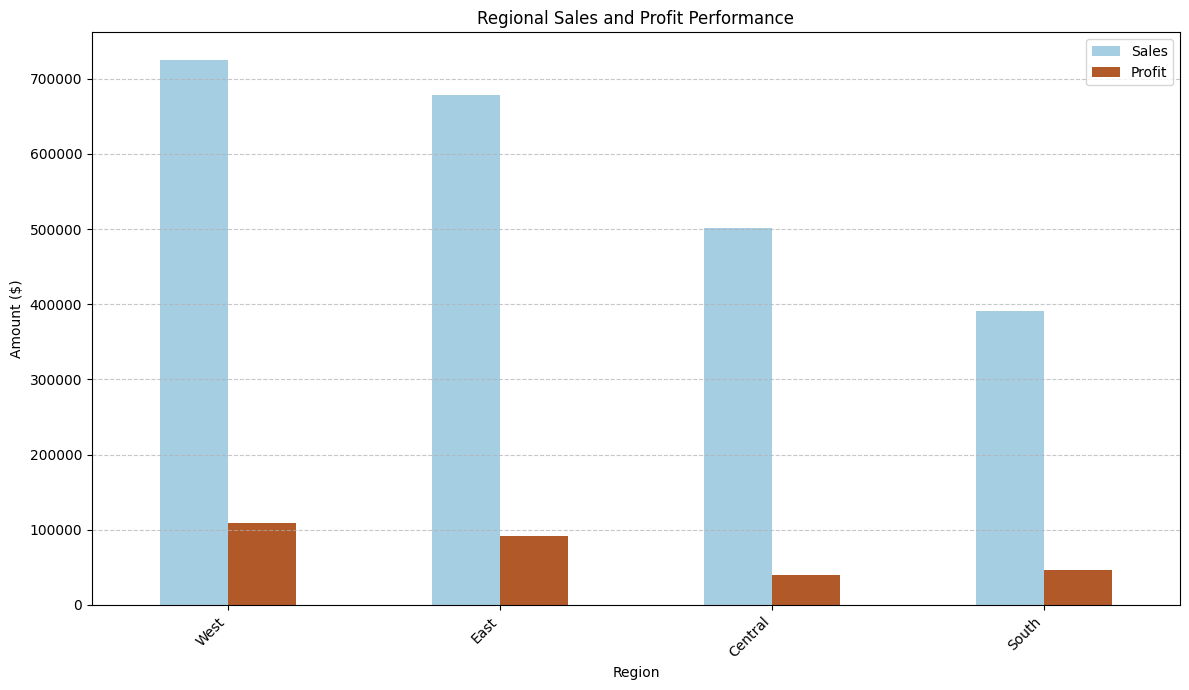

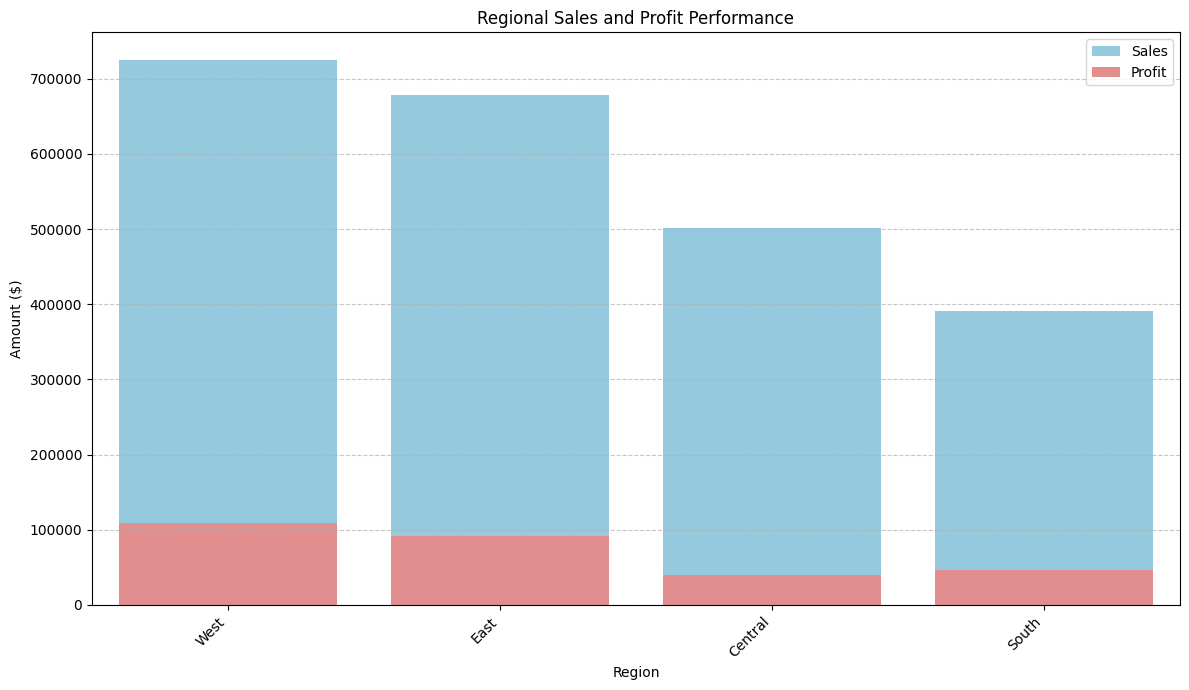

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Aggregate Sales and Profit by Region
regional_performance = dfSuperStore.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# 2. Create the Grouped Bar Chart
plt.figure(figsize=(12, 7))
regional_performance.plot(kind='bar', figsize=(12, 7), colormap='Paired')

plt.title('Regional Sales and Profit Performance')
plt.xlabel('Region')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Alternative: Using Seaborn for more control over aesthetics
plt.figure(figsize=(12, 7))
sns.barplot(x=regional_performance.index, y=regional_performance['Sales'], color='skyblue', label='Sales')
sns.barplot(x=regional_performance.index, y=regional_performance['Profit'], color='lightcoral', label='Profit')

plt.title('Regional Sales and Profit Performance')
plt.xlabel('Region')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



   **For Sales & Revenue Analyst:**
   * Sales trends over time with seasonality
   * Revenue drivers and correlations
   * Predictive factors for high-sales periods






/tmp/ipython-input-23-2898918024.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = dfSuperStore['Sales'].resample('M').sum()


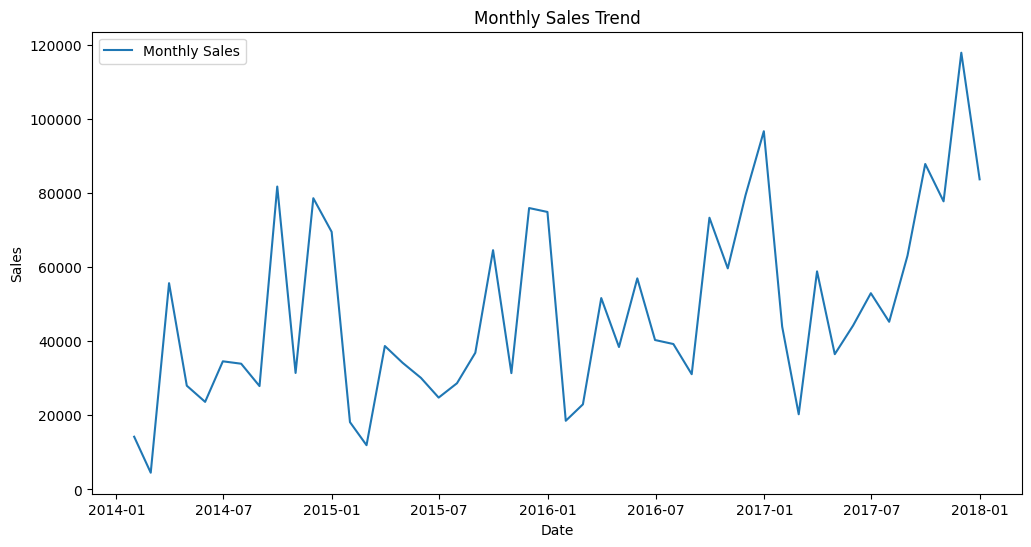

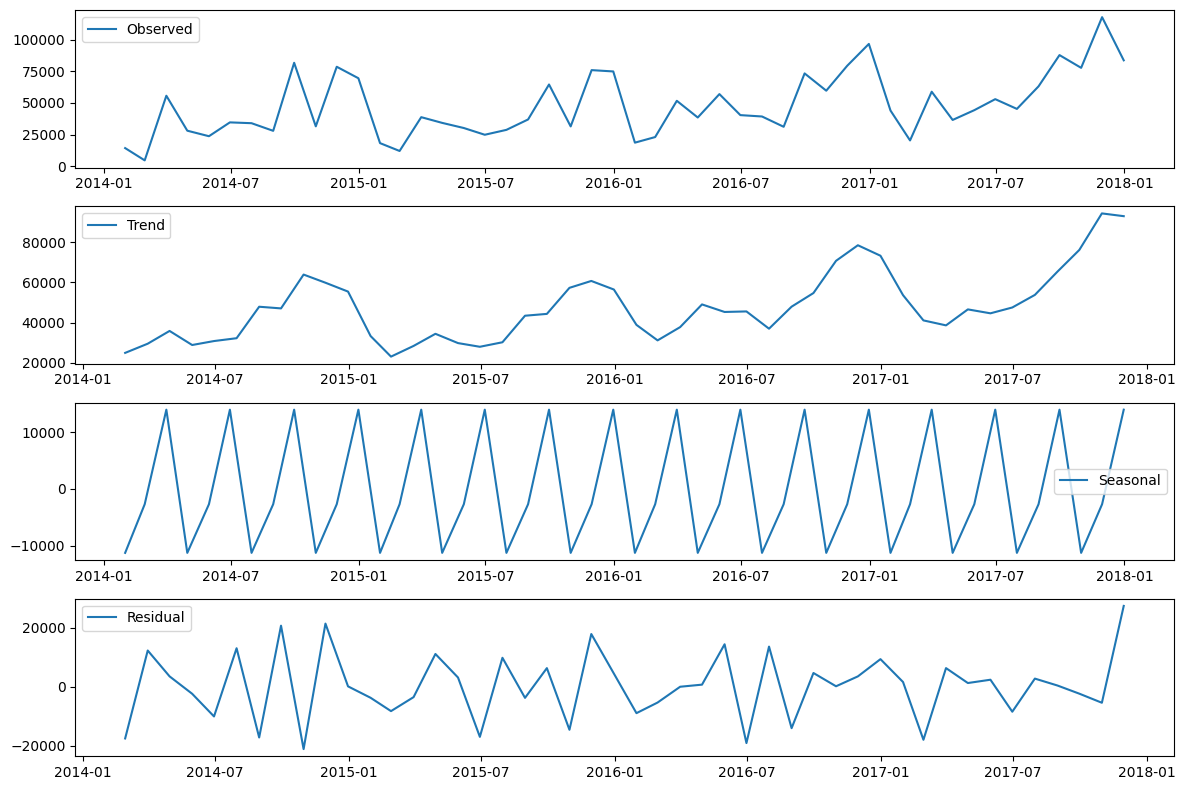

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


# 1. Ensure Date Type and Set Index
# Reset the index to make 'Order Date' a column again
dfSuperStore = dfSuperStore.reset_index()
dfSuperStore['Order Date'] = pd.to_datetime(dfSuperStore['Order Date'])
dfSuperStore.set_index('Order Date', inplace=True)

# 2. Resample to Monthly Frequency
monthly_sales = dfSuperStore['Sales'].resample('M').sum()

# 3. Plot Sales Trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Monthly Sales')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# 4. Time Series Decomposition
decomposition = seasonal_decompose(monthly_sales, model='additive', period=3) # Adjust period as needed

# 5. Plot Decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()

**Vusalizations Generated by Gemini AI - Sales vs Quantity**

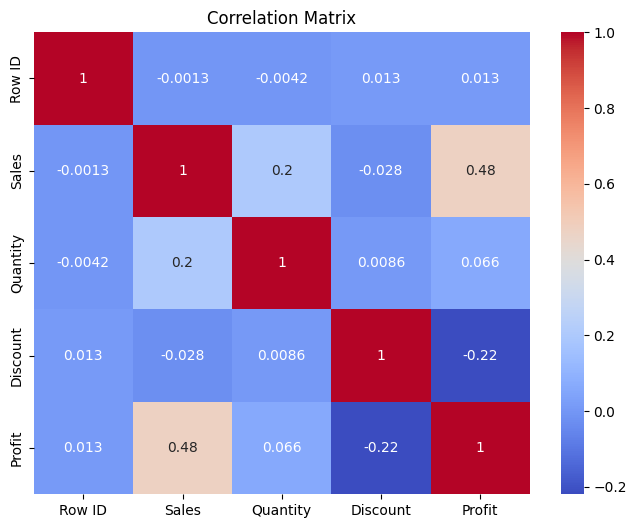

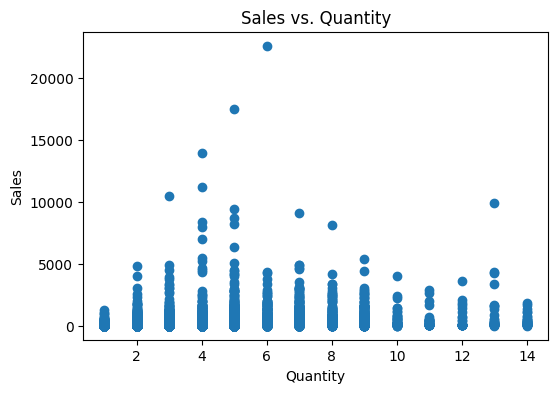

/tmp/ipython-input-26-414394788.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette='viridis')


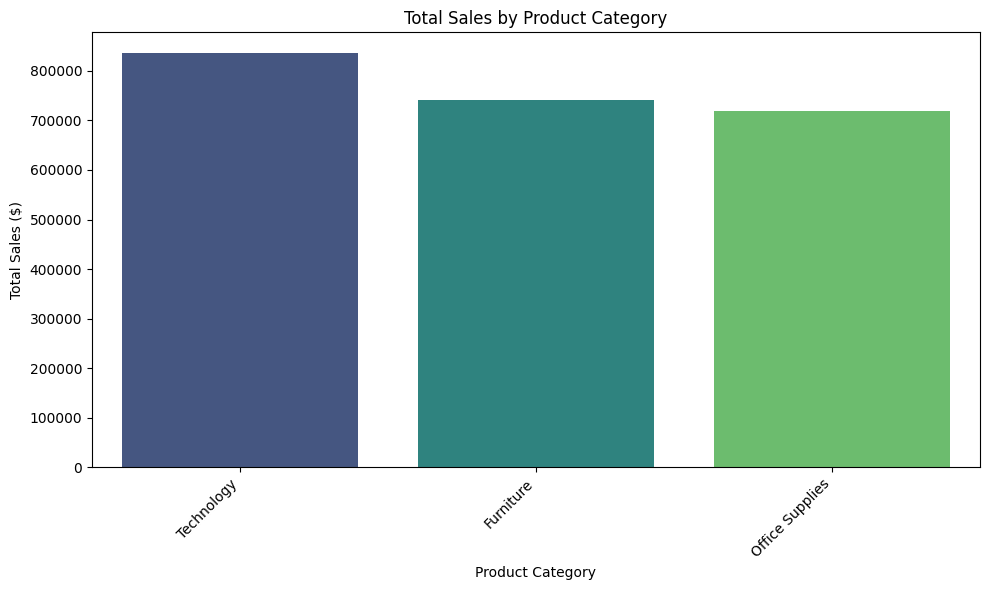

/tmp/ipython-input-26-414394788.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette='viridis')


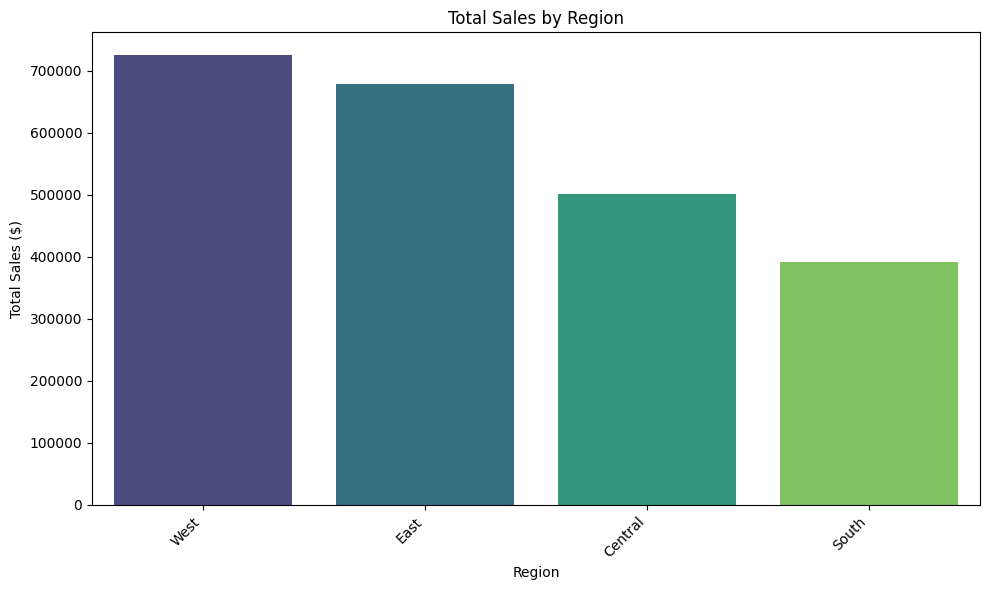

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate Correlation Matrix
correlation_matrix = dfSuperStore.corr(numeric_only=True)

# 2. Plot Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 3. Scatter Plots
plt.figure(figsize=(6, 4))
plt.scatter(df['Quantity'], df['Sales'])
plt.title('Sales vs. Quantity')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.show()


# 1. Sales by Category
sales_by_category = dfSuperStore.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Sales by Region
sales_by_region = dfSuperStore.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



**Vusalizations Generated by Gemini AI - Sales Vs Discount**

Mean Squared Error: 309950.1510901104
Coefficient: [-78.4523646]
Intercept: 245.43652561795105


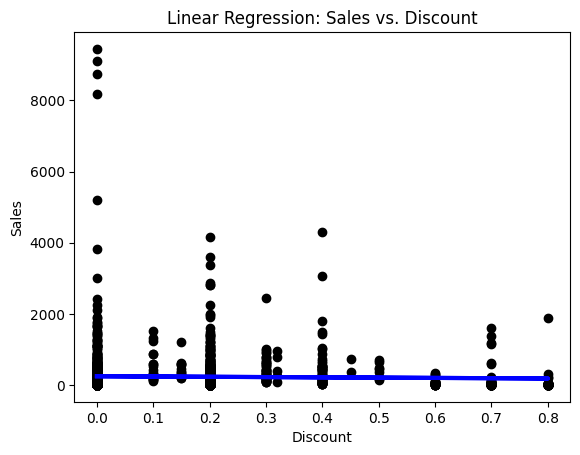

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# 1. Prepare Data
dfSuperStore['Order Date'] = pd.to_datetime(df['Order Date'])
dfSuperStore.set_index('Order Date', inplace=True)

# 2. Regression Analysis
X = dfSuperStore[['Discount']]
y = dfSuperStore['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the coefficients
print(f'Coefficient: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Plot the results
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.title('Linear Regression: Sales vs. Discount')
plt.show()


**Vusalizations Generated by Gemini AI - Sales Trend**

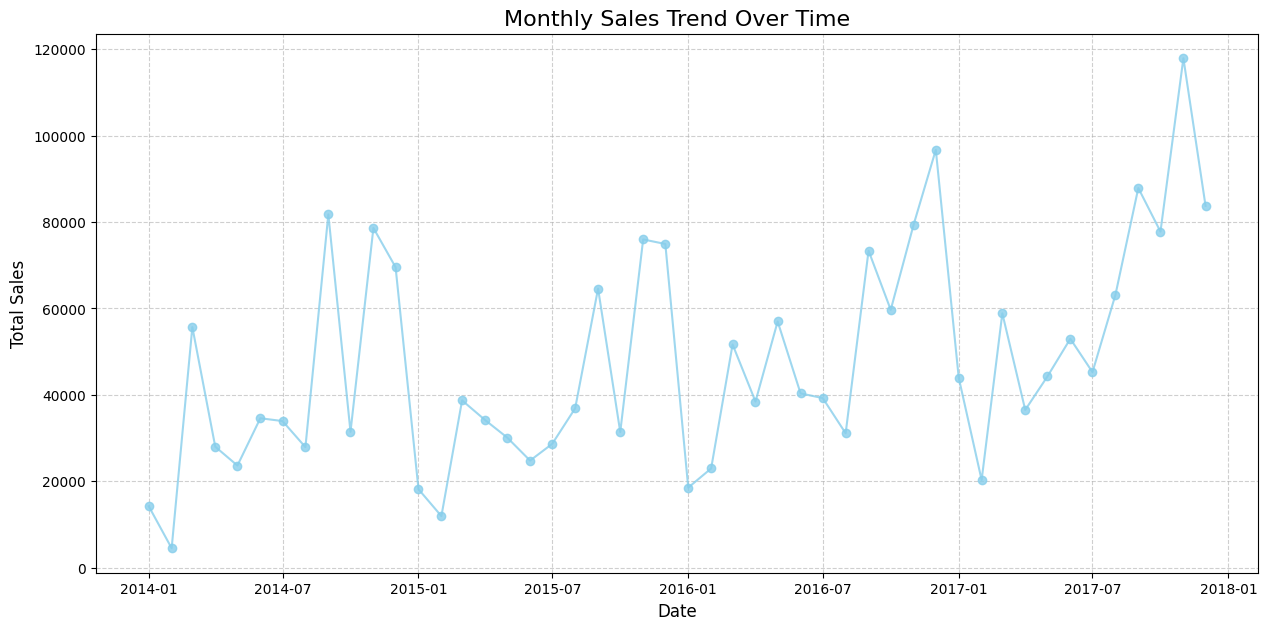

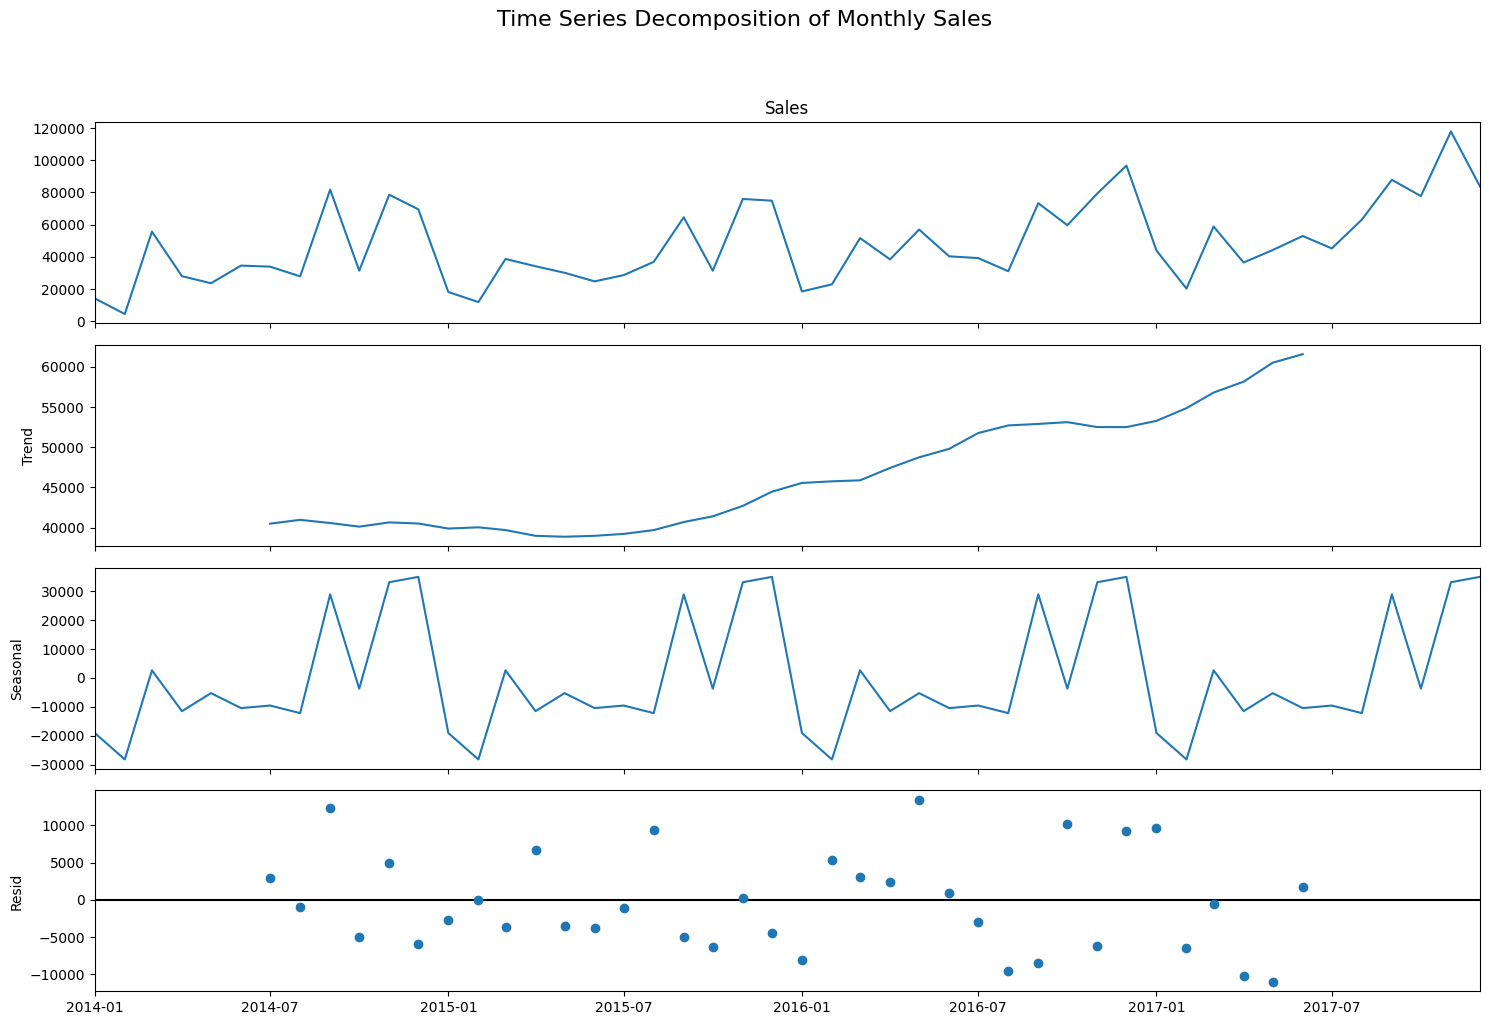

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose # For time series decomposition

# --- Assuming 'dfSuperStore' is your loaded and partially cleaned DataFrame ---
# Ensure 'Order Date' is a datetime object and set as index
# (This is crucial for time series analysis)

# First, check if 'Order Date' is a column. If not, it's likely already the index.
if 'Order Date' in dfSuperStore.columns:
    dfSuperStore['Order Date'] = pd.to_datetime(dfSuperStore['Order Date'], errors='coerce')
    dfSuperStore.set_index('Order Date', inplace=True)
elif isinstance(dfSuperStore.index, pd.DatetimeIndex):
    # If 'Order Date' is not a column and index is DatetimeIndex, it's already set
    pass
else:
    # If 'Order Date' is not a column and index is not DatetimeIndex, something is wrong.
    # Print info to diagnose.
    print("Error: 'Order Date' not found as column or DatetimeIndex.")
    dfSuperStore.info()

# Explicitly filter out rows where the index (Order Date) is NaT
dfSuperStore = dfSuperStore[dfSuperStore.index.notna()]

# Drop rows where critical dates are missing (e.g., due to 'coerce' from invalid date strings)
# This line might be redundant after the explicit filtering above, but keeping for safety
# dfSuperStore.dropna(subset=[dfSuperStore.index.name], inplace=True)


# 1. Aggregate Sales to Monthly Level (common for seasonality analysis)
# We use .sum() to get total sales for each month.
monthly_sales = dfSuperStore['Sales'].resample('MS').sum() # 'MS' for Month Start frequency

# Filter out any potential 0 sales months at the very beginning/end if data is sparse
monthly_sales = monthly_sales[monthly_sales > 0]

# Plotting the raw monthly sales trend
plt.figure(figsize=(15, 7))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='skyblue', alpha=0.8)
plt.title('Monthly Sales Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.ticklabel_format(style='plain', axis='y') # Prevent scientific notation on y-axis
plt.show()

# 2. Time Series Decomposition to reveal Trend, Seasonality, and Residuals
# The 'period' parameter is crucial. For monthly data with yearly seasonality, period=12.
# 'additive' model assumes seasonal fluctuations are constant in magnitude.
# 'multiplicative' model assumes seasonal fluctuations vary with level of the series.
# Based on typical superstore data, additive is often suitable first.
try:
    decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)

    fig = decomposition.plot()
    fig.set_size_inches(15, 10)
    fig.suptitle('Time Series Decomposition of Monthly Sales', fontsize=16, y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
    plt.show()

except Exception as e:
    print(f"Could not perform seasonal decomposition: {e}")
    print("Ensure there is enough data for the specified period (e.g., at least two full cycles for period=12).")
    print("Also, check if there are any NaN values in your 'monthly_sales' series.")

# Reset index for further categorical plotting if needed
dfSuperStore.reset_index(inplace=True)

**Vusalizations Generated by Gemini AI - Sales Vs Profit**

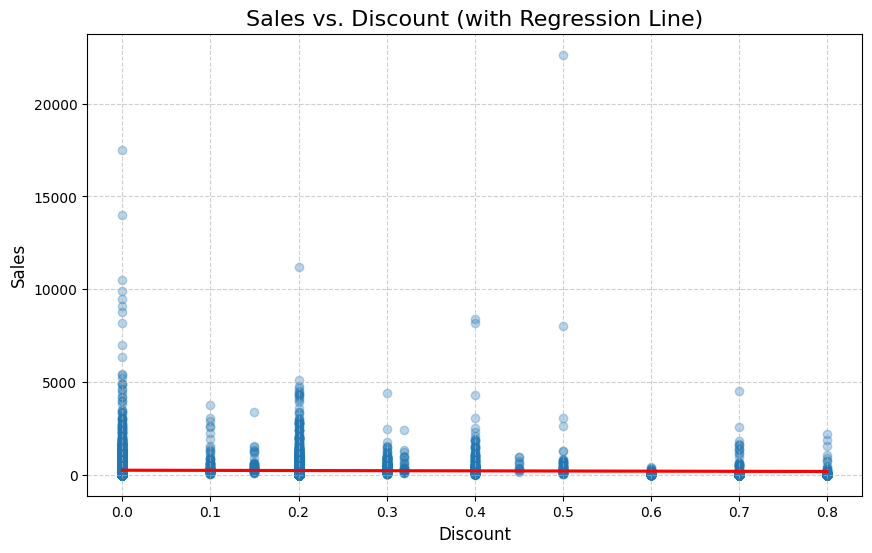

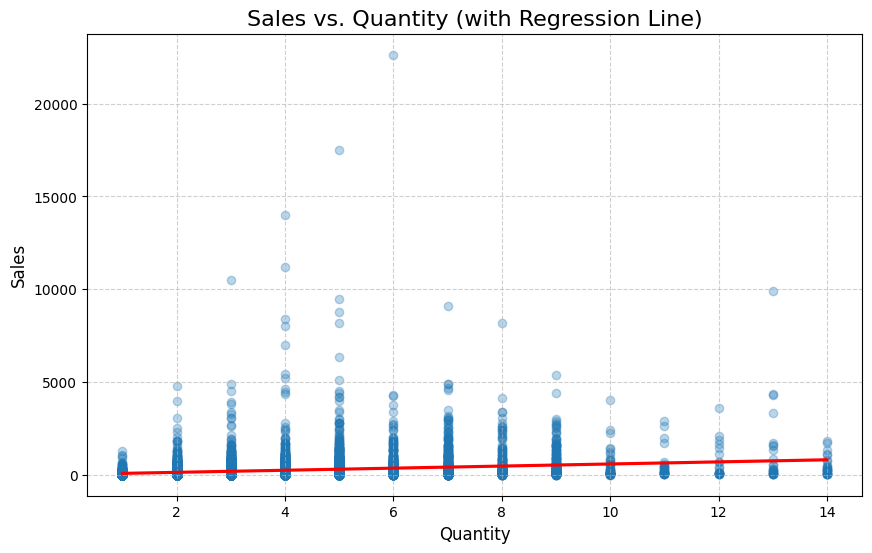

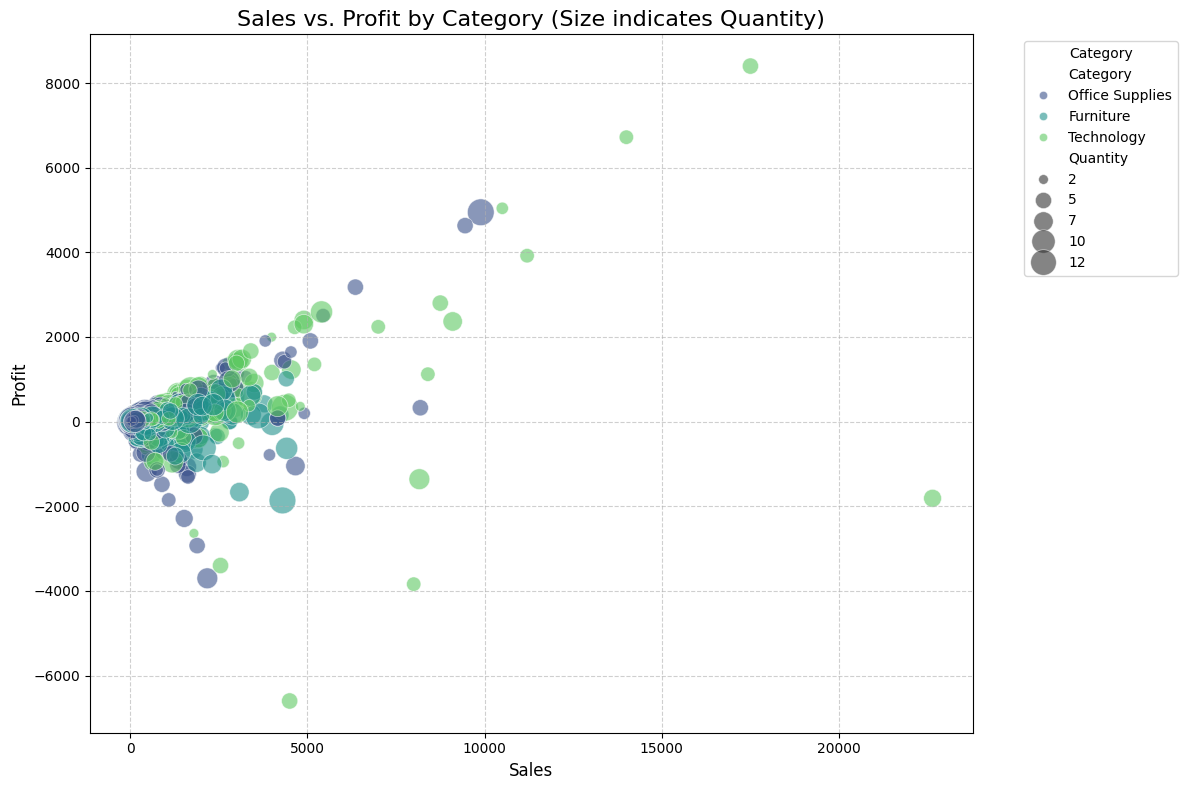

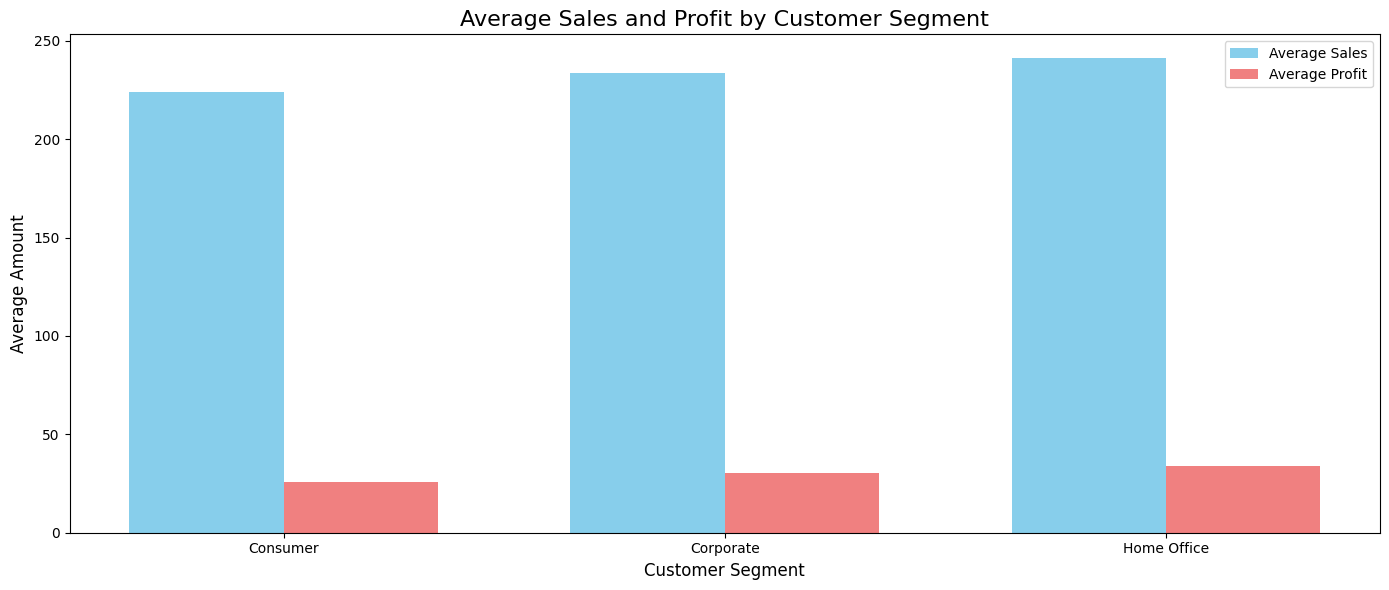

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from statsmodels.formula.api import ols # For more formal regression insights if needed

# Assuming 'df' is your loaded and cleaned Superstore DataFrame
# Ensure 'Sales', 'Profit', 'Discount', 'Quantity' are numerical

# 1. Sales vs. Discount (with a regression line)
# This explores if higher discounts lead to higher sales volumes, and vice-versa.
plt.figure(figsize=(10, 6))
sns.regplot(x='Discount', y='Sales', data=dfSuperStore, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Sales vs. Discount (with Regression Line)', fontsize=16)
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 2. Sales vs. Quantity (should be a strong positive relationship)
plt.figure(figsize=(10, 6))
sns.regplot(x='Quantity', y='Sales', data=dfSuperStore, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Sales vs. Quantity (with Regression Line)', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 3. Profit vs. Sales by Category (to identify high sales, high profit categories)
# Create a scatter plot of Profit vs. Sales and color by Category
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Sales', y='Profit', hue='Category', size='Quantity', sizes=(20, 400),
                data=dfSuperStore, alpha=0.6, palette='viridis')
plt.title('Sales vs. Profit by Category (Size indicates Quantity)', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Category')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. Average Sales and Profit per Customer Segment
# (To see if certain segments are more lucrative)
avg_metrics_by_segment = dfSuperStore.groupby('Segment')[['Sales', 'Profit']].mean().reset_index()

plt.figure(figsize=(14, 6))
bar_width = 0.35
index = np.arange(len(avg_metrics_by_segment['Segment']))

plt.bar(index, avg_metrics_by_segment['Sales'], bar_width, label='Average Sales', color='skyblue')
plt.bar(index + bar_width, avg_metrics_by_segment['Profit'], bar_width, label='Average Profit', color='lightcoral')

plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Average Amount', fontsize=12)
plt.title('Average Sales and Profit by Customer Segment', fontsize=16)
plt.xticks(index + bar_width / 2, avg_metrics_by_segment['Segment'], rotation=0)
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.tight_layout()
plt.show()
